In [16]:
# Common imports
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
from tensorflow import set_random_seed

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

In [17]:
data_dir = '2nd_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']

2004.02.16.11.42.39
2004.02.18.04.12.39
2004.02.14.03.52.39
2004.02.13.18.12.39
2004.02.14.00.52.39
2004.02.13.20.12.39
2004.02.17.11.42.39
2004.02.17.03.02.39
2004.02.18.12.22.39
2004.02.18.08.52.39
2004.02.17.08.32.39
2004.02.18.18.22.39
2004.02.14.10.52.39
2004.02.14.07.32.39
2004.02.18.04.42.39
2004.02.13.14.22.39
2004.02.14.19.22.39
2004.02.12.23.22.39
2004.02.18.11.42.39
2004.02.13.06.52.39
2004.02.13.15.02.39
2004.02.12.19.12.39
2004.02.13.17.02.39
2004.02.14.17.42.39
2004.02.14.05.12.39
2004.02.12.10.52.39
2004.02.19.01.02.39
2004.02.14.01.32.39
2004.02.12.11.32.39
2004.02.14.09.42.39
2004.02.13.06.22.39
2004.02.13.07.52.39
2004.02.19.03.52.39
2004.02.17.14.22.39
2004.02.16.23.32.39
2004.02.17.14.52.39
2004.02.14.04.22.39
2004.02.18.22.42.39
2004.02.14.06.22.39
2004.02.14.10.12.39
2004.02.15.09.12.39
2004.02.18.15.02.39
2004.02.19.02.52.39
2004.02.12.20.02.39
2004.02.15.06.02.39
2004.02.18.03.32.39
2004.02.19.04.12.39
2004.02.16.06.22.39
2004.02.14.16.02.39
2004.02.17.16.12.39


2004.02.17.09.32.39
2004.02.13.23.02.39
2004.02.12.11.12.39
2004.02.18.16.02.39
2004.02.14.08.52.39
2004.02.15.05.42.39
2004.02.13.00.32.39
2004.02.19.05.02.39
2004.02.15.10.52.39
2004.02.17.05.42.39
2004.02.15.04.12.39
2004.02.16.21.12.39
2004.02.16.18.02.39
2004.02.12.23.52.39
2004.02.17.14.12.39
2004.02.19.02.42.39
2004.02.15.16.52.39
2004.02.15.19.32.39
2004.02.18.22.12.39
2004.02.16.01.12.39
2004.02.14.04.02.39
2004.02.13.12.12.39
2004.02.15.07.52.39
2004.02.16.16.32.39
2004.02.17.10.12.39
2004.02.17.07.52.39
2004.02.12.21.12.39
2004.02.13.08.42.39
2004.02.16.00.32.39
2004.02.18.07.52.39
2004.02.16.17.42.39
2004.02.13.22.22.39
2004.02.12.17.02.39
2004.02.18.09.52.39
2004.02.15.00.32.39
2004.02.15.16.32.39
2004.02.12.21.52.39
2004.02.13.01.02.39
2004.02.12.21.22.39
2004.02.17.17.32.39
2004.02.19.06.02.39
2004.02.13.19.22.39
2004.02.16.20.02.39
2004.02.13.16.42.39
2004.02.14.23.32.39
2004.02.18.19.32.39
2004.02.17.00.02.39
2004.02.13.11.22.39
2004.02.13.05.12.39
2004.02.15.09.22.39


2004.02.14.14.52.39
2004.02.16.20.12.39
2004.02.13.21.52.39
2004.02.13.17.12.39
2004.02.17.03.12.39
2004.02.14.12.02.39
2004.02.13.22.42.39
2004.02.12.11.42.39
2004.02.14.20.22.39
2004.02.16.15.02.39
2004.02.19.01.32.39
2004.02.15.14.22.39
2004.02.16.06.02.39
2004.02.15.13.22.39
2004.02.16.20.32.39
2004.02.13.04.52.39
2004.02.15.16.42.39
2004.02.12.16.42.39
2004.02.13.11.42.39
2004.02.13.10.12.39
2004.02.18.00.12.39
2004.02.13.03.12.39
2004.02.19.04.22.39
2004.02.15.22.52.39
2004.02.15.07.22.39
2004.02.15.05.12.39
2004.02.16.02.32.39
2004.02.17.16.52.39
2004.02.16.00.42.39
2004.02.17.22.32.39
2004.02.19.01.12.39
2004.02.13.21.12.39
2004.02.13.19.02.39
2004.02.16.08.42.39
2004.02.16.11.22.39
2004.02.16.05.32.39
2004.02.13.20.32.39
2004.02.18.17.52.39
2004.02.13.09.32.39
2004.02.13.10.02.39
2004.02.16.14.12.39
2004.02.15.12.22.39
2004.02.17.09.42.39
2004.02.17.20.32.39
2004.02.16.04.32.39
2004.02.18.16.32.39
2004.02.18.05.02.39
2004.02.14.16.32.39
2004.02.13.01.12.39
2004.02.18.23.52.39


In [18]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_2.csv')
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


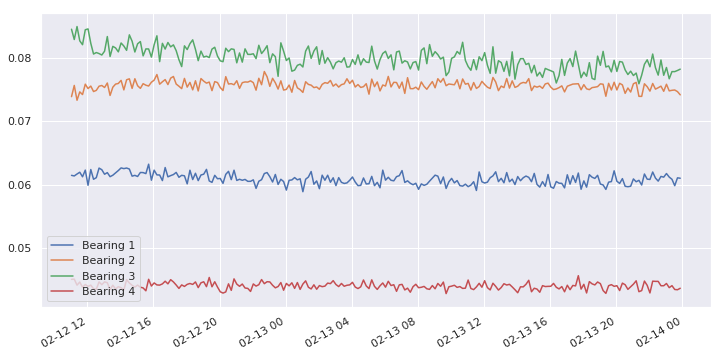

In [19]:
dataset_train = merged_data['2004-02-12 11:02:39':'2004-02-13 23:52:39']
dataset_test = merged_data['2004-02-13 23:52:39':]
dataset_train.plot(figsize = (12,6))

In [20]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [22]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

In [23]:
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

In [24]:
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [25]:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

In [26]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [27]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [30]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)


TypeError: 'numpy.ndarray' object is not callable

In [31]:
mean_distr = data_train.mean(axis=0)
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

(0.0, 15)

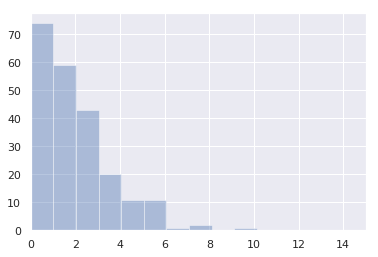

In [32]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Mahalanobis dist')

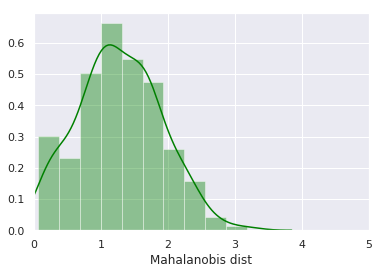

In [33]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [34]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
2004-02-13 23:52:39,1.032676,3.812045,False
2004-02-14 00:02:39,1.148163,3.812045,False
2004-02-14 00:12:39,1.509998,3.812045,False
2004-02-14 00:22:39,1.849725,3.812045,False
2004-02-14 00:32:39,0.701075,3.812045,False


In [35]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance.csv')

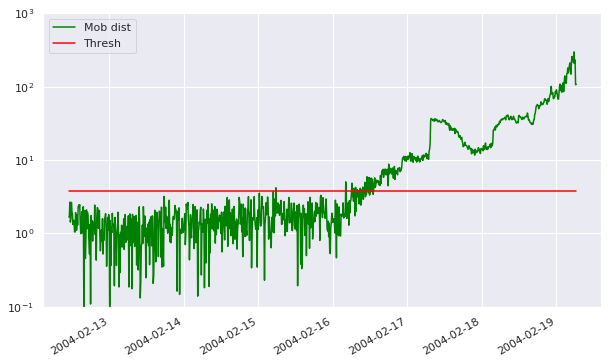

In [36]:
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])

In [37]:
seed(10)
set_random_seed(10)
act_func = 'elu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=10

In [38]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

Train on 210 samples, validate on 12 samples
Epoch 1/100
210/210 [==============================] - 1s 6ms/step - loss: 0.2750 - val_loss: 0.1831
Epoch 2/100
210/210 [==============================] - 0s 244us/step - loss: 0.1461 - val_loss: 0.0867
Epoch 3/100
210/210 [==============================] - 0s 411us/step - loss: 0.0781 - val_loss: 0.0466
Epoch 4/100
210/210 [==============================] - 0s 515us/step - loss: 0.0481 - val_loss: 0.0345
Epoch 5/100
210/210 [==============================] - 0s 237us/step - loss: 0.0373 - val_loss: 0.0320
Epoch 6/100
210/210 [==============================] - 0s 425us/step - loss: 0.0344 - val_loss: 0.0339
Epoch 7/100
210/210 [==============================] - 0s 376us/step - loss: 0.0334 - val_loss: 0.0341
Epoch 8/100
210/210 [==============================] - 0s 256us/step - loss: 0.0328 - val_loss: 0.0332
Epoch 9/100
210/210 [==============================] - 0s 268us/step - loss: 0.0323 - val_loss: 0.0338
Epoch 10/100
210/210 [========

Epoch 79/100
210/210 [==============================] - 0s 350us/step - loss: 0.0122 - val_loss: 0.0166
Epoch 80/100
210/210 [==============================] - 0s 351us/step - loss: 0.0122 - val_loss: 0.0171
Epoch 81/100
210/210 [==============================] - 0s 265us/step - loss: 0.0121 - val_loss: 0.0165
Epoch 82/100
210/210 [==============================] - 0s 266us/step - loss: 0.0122 - val_loss: 0.0165
Epoch 83/100
210/210 [==============================] - 0s 416us/step - loss: 0.0121 - val_loss: 0.0164
Epoch 84/100
210/210 [==============================] - 0s 353us/step - loss: 0.0121 - val_loss: 0.0168
Epoch 85/100
210/210 [==============================] - 0s 205us/step - loss: 0.0122 - val_loss: 0.0165
Epoch 86/100
210/210 [==============================] - 0s 298us/step - loss: 0.0121 - val_loss: 0.0169
Epoch 87/100
210/210 [==============================] - 0s 319us/step - loss: 0.0121 - val_loss: 0.0171
Epoch 88/100
210/210 [==============================] - 0s 294us

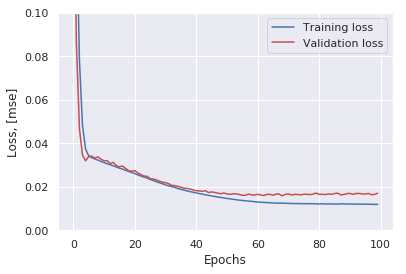

In [39]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

(0.0, 0.5)

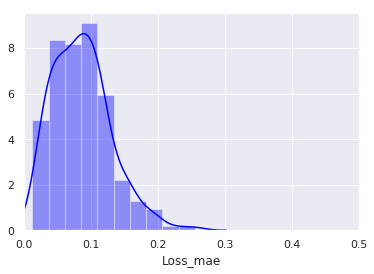

In [40]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.5])

In [41]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.3
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
2004-02-13 23:52:39,0.130665,0.3,False
2004-02-14 00:02:39,0.117234,0.3,False
2004-02-14 00:12:39,0.034769,0.3,False
2004-02-14 00:22:39,0.143377,0.3,False
2004-02-14 00:32:39,0.070327,0.3,False


In [42]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.3
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

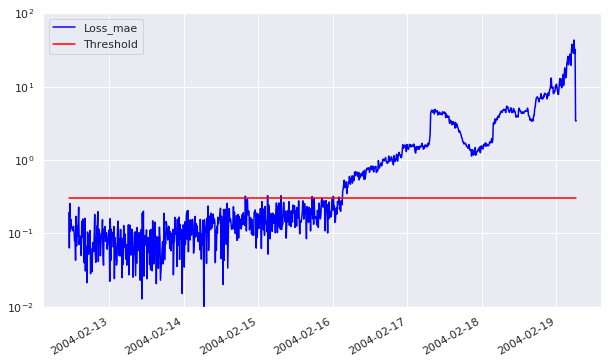

In [43]:
scored.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])